In [283]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

## 1. Load the data and understand it.

In [286]:
df_backpain=pd.read_csv('backpain.csv')
df_backpain

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,NaN
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,NaN
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,NaN
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,NaN


In [ ]:

'''Data description: -

back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine. 

Typical sources of low back pain include:
The large nerve roots in the low back that go to the legs may be irritated

The smaller nerves that supply the low back may be irritated

The large paired lower back muscles (erector spinae) may be strained

The bones, ligaments or joints may be damaged

An intervertebral disc may be degenerating

An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also cause back muscle spasms, which don't sound like much but can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. A simple lower back muscle strain might be excruciating enough to necessitate an emergency room visit, while a degenerating disc might cause only mild, intermittent discomfort.

This data set is about to identify a person is abnormal or normal using collected physical spine details/data.'''

In [ ]:
'''The target variable is therefore the column class_att which tells whether a person whose physical 
spine details are collected is normal or abnormal with respect to the lower back pain.'''

In [287]:
df_backpain.shape

(310, 14)

In [288]:
df_backpain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
Col1           310 non-null float64
Col2           310 non-null float64
Col3           310 non-null float64
Col4           310 non-null float64
Col5           310 non-null float64
Col6           310 non-null float64
Col7           310 non-null float64
Col8           310 non-null float64
Col9           310 non-null float64
Col10          310 non-null float64
Col11          310 non-null float64
Col12          310 non-null float64
Class_att      310 non-null object
Unnamed: 13    14 non-null object
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


## 2. DO DATA PREPROCESSING AND UNDERSTAND THE DATA FURTHER

#### 2.A) First let's give all the column names properly

In [289]:

df_backpain.rename(columns={"Col1":"pelvic_incidence","Col2":"pelvictilt","Col3":"lumbar_lordosis_angle",
                            "Col4":"sacral_slope","Col5":"pelvic_radius","Col6":"degree_spondylolisthesis",
                            "Col7":"pelvic_slope","Col8":"Direct_tilt","Col9":"thoracic_slope",
                            "Col10":"cervical_tilt","Col11":"sacrum_angle","Col12":"scoliosis_slope",
                            "Class_att":"Status"},inplace=True)

In [290]:
df_backpain

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,NaN
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,NaN
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,NaN
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,NaN


In [291]:
df_backpain.drop('Unnamed: 13',1,inplace=True)

#### 2.B) Check for the null values

In [292]:
df_backpain.isnull().any()

pelvic_incidence            False
pelvictilt                  False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
pelvic_slope                False
Direct_tilt                 False
thoracic_slope              False
cervical_tilt               False
sacrum_angle                False
scoliosis_slope             False
Status                      False
dtype: bool

#### 2.C)Check for the statistical summary 

In [293]:
df_backpain.describe()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


#### 2.d)Check for outliers

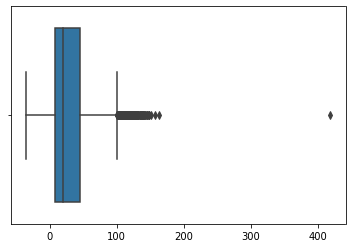

In [294]:
sns.boxplot(df_backpain.drop(['Status'],axis=1))

In [ ]:
'''the outliers are condierable as far as the number of data points are concerned so we don't need to remove them,
also we can figure out from the above plot that the plot is right skewed.'''

## 3. DO EXPLORATORY DATA ANALYTICS (EDA)

#### 3.A)First study the target variable by doing a countplot of that variable which here is 'Status'

In [295]:
df_backpain

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


count          310
unique           2
top       Abnormal
freq           210
Name: Status, dtype: object


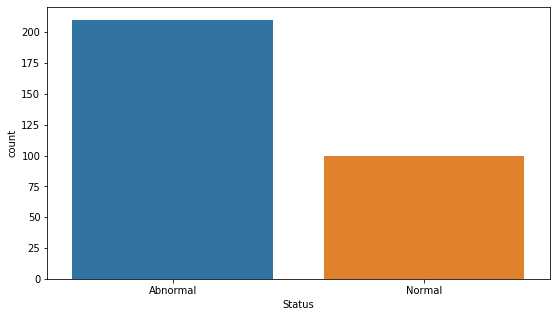

In [296]:
print(df_backpain['Status'].describe(include=['O']))
fig,axes = plt.subplots(1,1,figsize=(9,5))
sns.countplot(x=df_backpain['Status'],ax=axes)

In [ ]:
'''From the above graph we can say that:-
a) There are two unique categories(normal,abnormal) in the target variable which of type object-therefore
we can say this is a classification problem
b) Most of the candidates(210) in the dataset are found having abnormal behaviour that is they are suffering from
lower back pain.
c)The majority and minority class ratio in the data set (interms of percentage) is 67:32 approximately,
that means 67% of the data is of people having abnormal result and 32% have normal result,so the dataset is a
balanced one.'''

#### 3.B) Now we will separate all the numerical features and do the analysis

In [297]:
df_backpain_features=df_backpain.select_dtypes(include=['float64'])
df_backpain_features.head()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171


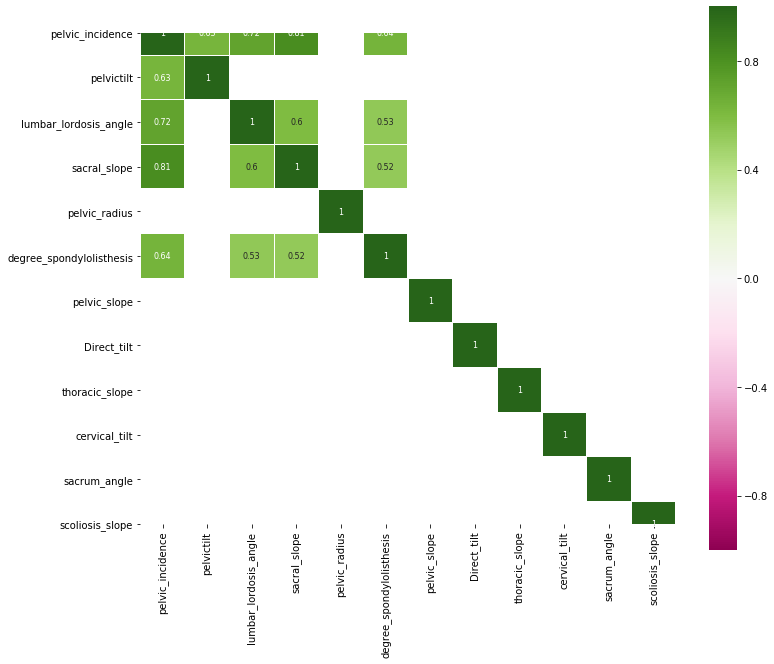

In [298]:
# relationship between the independent variables - multicollinearity
#sns.heatmap(df_backpain_features.corr())

corr = df_backpain_features.corr() # check for multicollinearity
plt.figure(figsize=(12,10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
           cmap='PiYG', vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={'size':8}, square=True);

In [ ]:
'''we can draw the following inferences:-
a. The correlation between pelvic_incidence and sacral_slope is highest 0.81
b. The correlation between lumbar_lordosis_angle and pelvic_incidence is 2nd highest 0.72
c. The lumbar_lordosis_angle and sacral_slope also share a strong correlation of 0.6(so we don't have to
   consider both the features).
d. market_share_1 has a higher correlation 0.37(>0.31) with distance
e. Features that don't have correlation with any of the features are pelvic_slope,Direct_tilt,thoracic_slope,
   cervical_tilt,sacrum_angle,scoliosis_slopeno, we need to see the impact they make on the target before deciding
   whether or not to consider these features.'''

In [300]:
# now since our target variable is a categorical variable , in order to find the relationship of the numerical features
# we will go for anova
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

columns=["pelvic_incidence","pelvictilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius",
         "degree_spondylolisthesis","pelvic_slope","Direct_tilt","thoracic_slope",
                            "cervical_tilt","sacrum_angle","scoliosis_slope",]
features_pvalues={}
sym='~'
tar='C(Status)'
for i in columns:
    formula = i+sym+tar
    model = ols(formula, df_backpain).fit()
    aov_table = anova_lm(model, typ=2)
    features_pvalues[i]=aov_table['PR(>F)'].values[0]

In [301]:
df_pvalues=pd.DataFrame(index=['pvalues'],data=features_pvalues)
df_pvalues

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pvalues,1.516337e-10,4.122674e-09,1.898449e-08,0.000188,2.529022e-08,2.201286e-16,0.326887,0.487351,0.3865,0.078618,0.637238,0.22362


In [ ]:
'''considering the above p-values(at alpha=0.05), we can say :- 
a)the features which are important and making most significant impact
on the target variable(status) are pelvic_incidence,pelvictilt,lumbar_lordosis_angle,
pelvic_radius,degree_spondylolisthesis.

b) sacrum_angle,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,scoliosis_slope are not at all significant.'''

## 4.NOW EXPLORE THE FEATURES VISUALLY AND OBTAIN NECESSARY INSIGHTS

In [ ]:
'''we will do the analysis only for the important features :- 
pelvic_incidence,pelvictilt,lumbar_lordosis_angle,pelvic_radius,degree_spondylolisthesis.'''

In [302]:
#bi-variate analysis
df_backpain.groupby('Status').mean()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019


In [303]:
df_backpain.groupby('Status').median()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.7506,12.77005,11.973735,-14.892070,24.50940
Normal,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.4146,13.40975,11.330750,-13.974694,27.72795


#### 4.a)Distplot

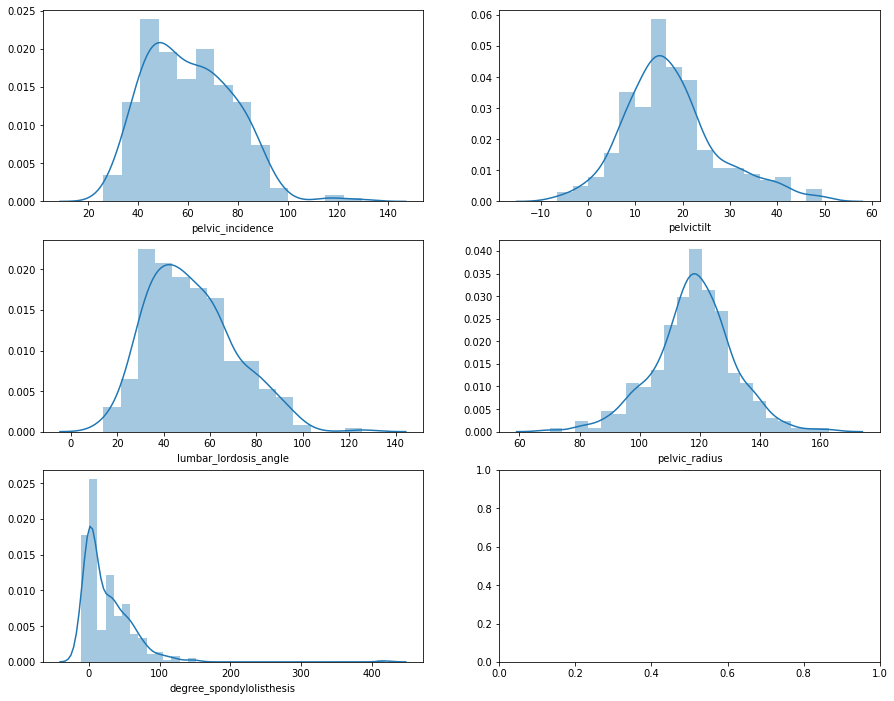

In [304]:
fig,axes=plt.subplots(3,2,figsize=(15,12))
sns.distplot(df_backpain_features['pelvic_incidence'],ax=axes[0][0])
sns.distplot(df_backpain_features['pelvictilt'],ax=axes[0][1])
sns.distplot(df_backpain_features['lumbar_lordosis_angle'],ax=axes[1][0])
sns.distplot(df_backpain_features['pelvic_radius'],ax=axes[1][1])
sns.distplot(df_backpain_features['degree_spondylolisthesis'],ax=axes[2][0])

In [ ]:
'''following inferences can be drawn from above:-
1.The features pelvic_incidence,lumbar_lordosis_angle are slightly right skewed with less outliers.
2.The feature degree_spondylolisthesis is highly right skewed with more number of outliers.
3.On the other hand the features pelvictilt,pelvic_radius are showing normal behaviour with no outliers.'''

#### 4.B)Boxplot

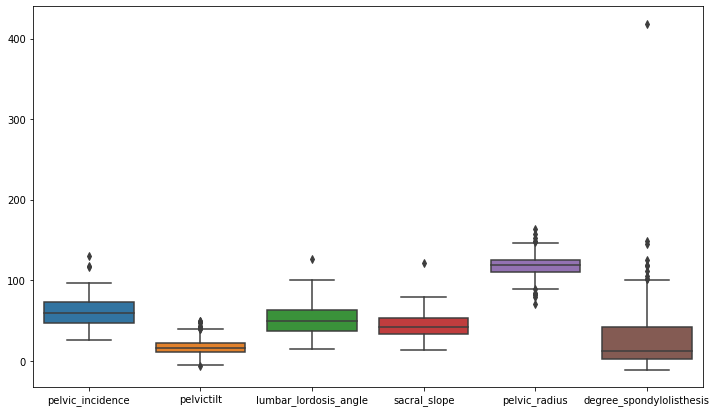

In [204]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df_backpain_features.drop(['sacrum_angle','pelvic_slope','Direct_tilt','thoracic_slope',
                                            'cervical_tilt',
                                            'scoliosis_slope'],axis=1))

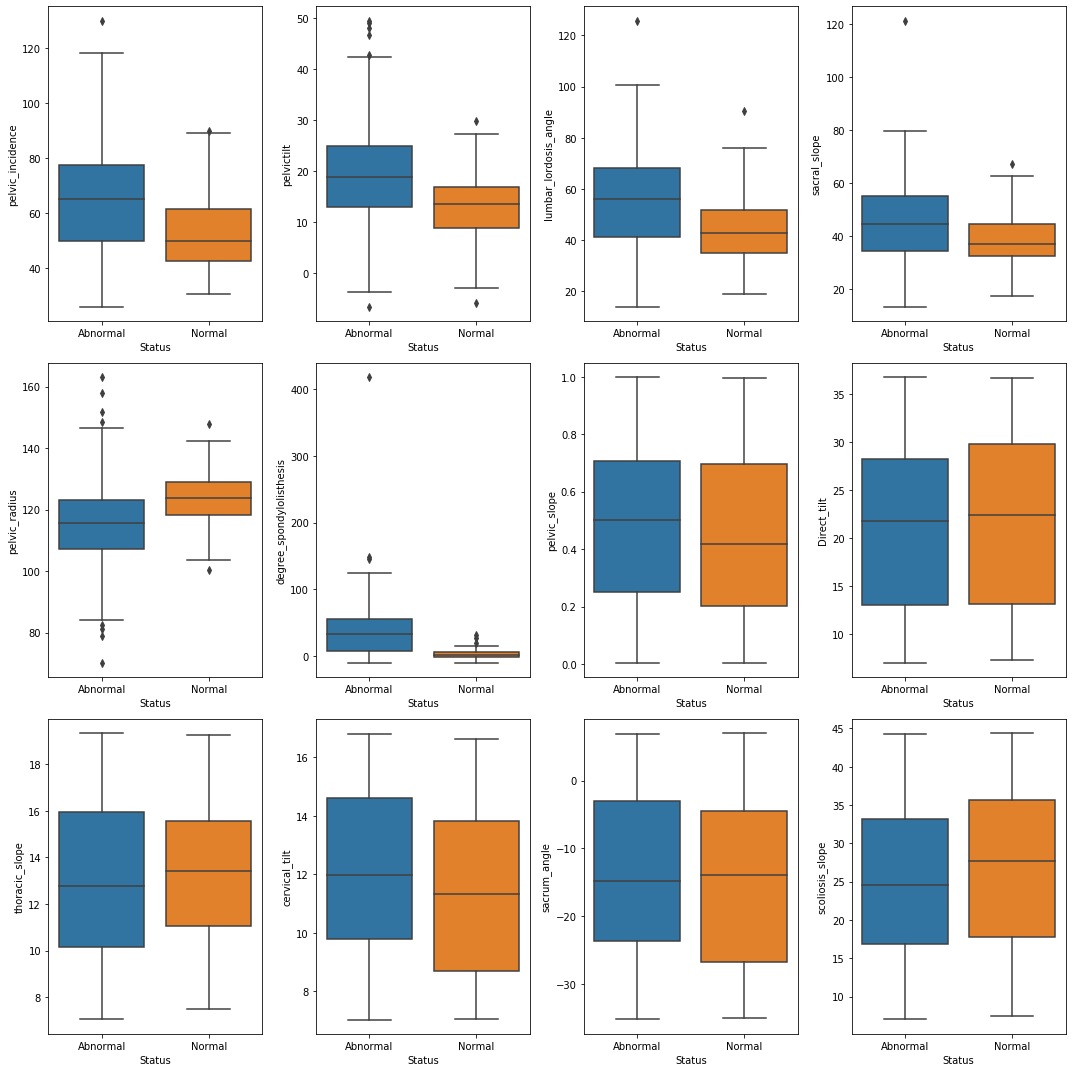

In [205]:
#for all the features.
fig,axes = plt.subplots(3,4,figsize=(15,15))
axes = axes.flatten()

for i in range(0,len(df_backpain.columns)-1):
    sns.boxplot(x='Status',y=df_backpain.iloc[:,i],data=df_backpain,orient='v',ax=axes[i])
    
plt.tight_layout()
plt.show()

In [ ]:
'''from the above boxplot we can observe that :-
a)The pelvic_radius feature has outliers on either sides(upper and lower).
b)All features follow a norrmal distribution except degree_spondylolisthesis,the outliers may be some exceptional
cases of abnormal behaviour and might be important cases in this domain.'''

#### 4.C)Pairplot

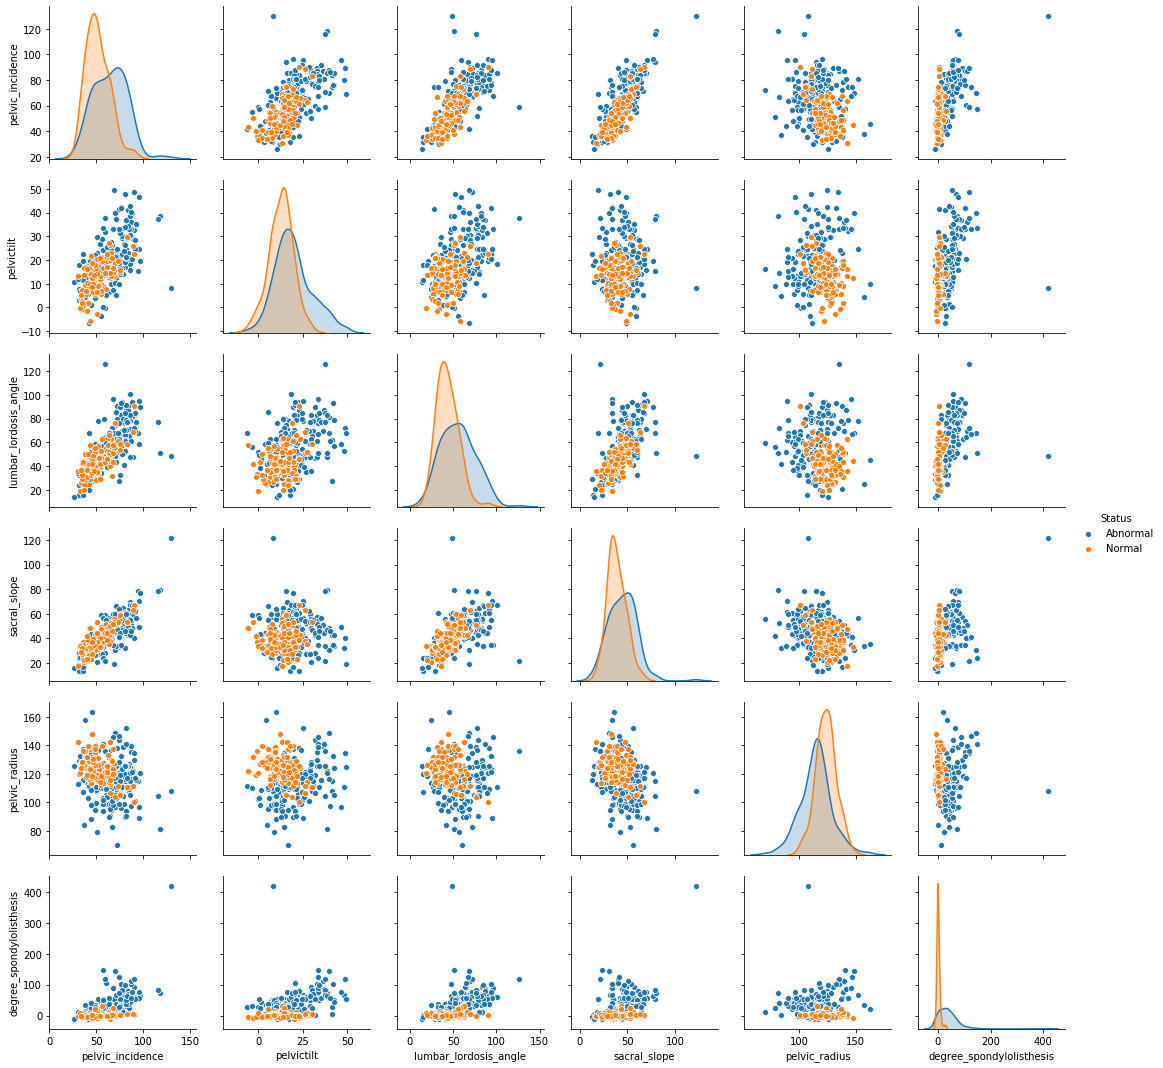

In [206]:
sns.pairplot(df_backpain.drop(['sacrum_angle','pelvic_slope','Direct_tilt','thoracic_slope',
                                            'cervical_tilt',
                                            'scoliosis_slope'],axis=1),hue='Status')

In [ ]:
'''from the above pairplot we can draw the following inferences,both abnormal and normal behaviours 
confirm some relationship or pattern amongst the features:-
a)The sacral_slope value increase with increase in pelvic_incidence(linear positive).
b)The lumbar_lordosis_angle value increase with increase in pelvic_incidence(linear positive).
c)There's no relationship between lumbar_lordosis_angle and pelvic_radius.
d)Pelvic_radius shares almost no specific relationship with other fetures.
e)degree_spondylolisthesis also shares almost no specific relationship with other fetures.'''

#### 4.d)Barplot

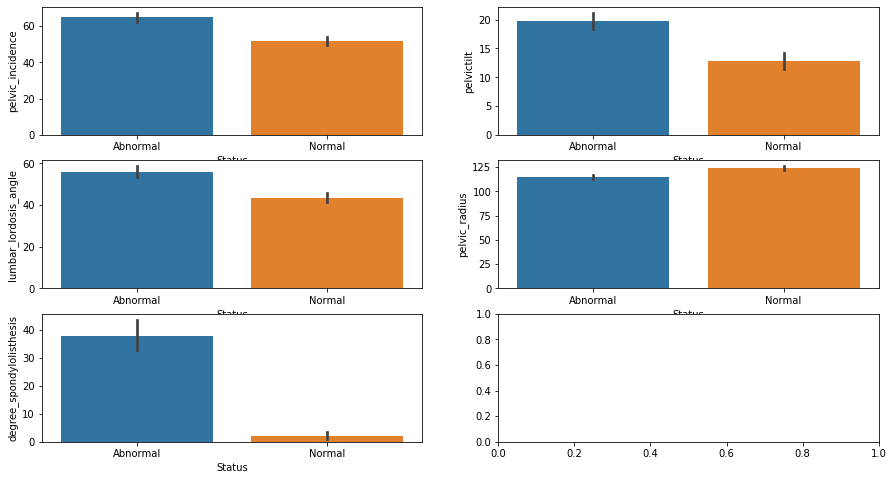

In [207]:
fig2,axes2=plt.subplots(3,2,figsize=(15,8))
sns.barplot(x='Status',y='pelvic_incidence',data=df_backpain,ax=axes2[0][0])
sns.barplot(x='Status',y='pelvictilt',data=df_backpain,ax=axes2[0][1])
sns.barplot(x='Status',y='lumbar_lordosis_angle',data=df_backpain,ax=axes2[1][0])
sns.barplot(x='Status',y='pelvic_radius',data=df_backpain,ax=axes2[1][1])
sns.barplot(x='Status',y='degree_spondylolisthesis',data=df_backpain,ax=axes2[2][0])

In [ ]:
'''Above data gives the mean values of each individual physical spine features for normal and abnormal
spine behaviour, following inferences can be drawn :-
a)It can be noted that in normal spine behaviour the average pelvictilt value,lumbar_lordosis_angle value,
pelvic_incidence values are lower than those observed in case of abnormal behaviour.
b)The average pelvic_radius value is high(around 120) for normal spine behaviour than the abnormal case.
c)For a normal spine behaviour the average degree_spondylolisthesis value seen is very low, 
all the above cases(plots) resulting in high right skewness and outliers are therefore cases of eceptionally 
abnormal behaviour with highest degree_spondylolisthesis value.'''

### Feature Selection: Backward elemination (P-value approach)

In [305]:
df_backpain['Status'].replace({'Normal':'0','Abnormal':'1'},inplace=True)

### The below step is needed before building the model - because even if the ml package(sklearn) builds the model without throwing any error, we will get a value error(Pandas data cast to numpy dtype of object.) when trying to build a statistical model ,converting to integer at this step will ensure that problem doesnot arise

In [306]:
df_backpain['Status']=df_backpain['Status'].astype('int64')

In [307]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df_backpain)
df_constant.head()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,1.0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,1.0,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,1.0,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,1.0,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,1.0,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [308]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df_constant.columns[:-1]
model=sm.Logit(df_backpain.Status,df_constant[cols])
result=model.fit()
result.summary()

         Current function value: 0.284109
         Iterations: 35


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  310
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                           12
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.5482
Time:                        01:29:07   Log-Likelihood:                -88.074
converged:                      False   LL-Null:                       -194.93
Covariance Type:            nonrobust   LLR p-value:                 4.778e-39
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       15.1816      3.554      4.271      0.000       8.215      22.148
pelvic_incidence             4.6883        nan        nan        nan         nan         nan
pelvictilt                  -4.6071        nan        nan        nan         nan         nan
lumbar_lordosis_angle       -0.0221      0.023     -0.948      0.343      -0.068       0.024
sacral_slope                -4.7830        nan        nan        nan         nan         nan
pelvic_radius               -0.1054      0.023     -4.484      0.000      -0.151      -0.059
degree_spondylolisthesis     0.1709      0.024      7.196      0.000       0.124       0.217
pelvic_slope                -0.2188      0.688     -0.318      0.750      -1.567       1.130
Direct_tilt                  0.0137      0.023      0.587      0.557      -0.032       0.059
thoracic_slope              -0.0522      0.058     -0.902      0.367      -0.166       0.061
cervical_tilt                0.0496      0.066      0.747      0.455      -0.081       0.180
sacrum_angle                 0.0049      0.016      0.311      0.756      -0.026       0.036
scoliosis_slope             -0.0098      0.019     -0.527      0.598      -0.046       0.027
============================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [309]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eliminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df_constant,df_backpain['Status'],cols)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [310]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  310
Model:                          Logit   Df Residuals:                      305
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.5410
Time:                        01:29:11   Log-Likelihood:                -89.469
converged:                       True   LL-Null:                       -194.93
Covariance Type:            nonrobust   LLR p-value:                 1.687e-44
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       15.4552      3.273      4.723      0.000       9.041      21.869
pelvictilt                   0.0665      0.029      2.272      0.023       0.009       0.124
sacral_slope                -0.1149      0.023     -5.072      0.000      -0.159      -0.071
pelvic_radius               -0.1089      0.023     -4.780      0.000      -0.154      -0.064
degree_spondylolisthesis     0.1654      0.023      7.227      0.000       0.121       0.210
============================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Here onwards , for building the logistic regression model(with scaled and unscaled data),we will use the above obtained significant features.

### LOGISTIC REGRESSION - Splitting data to train and test split(unscaled data)

In [311]:
import sklearn
new_features=df_backpain[['pelvictilt','sacral_slope','pelvic_radius','degree_spondylolisthesis','Status']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [312]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

## Model Evaluation

## Model accuracy

In [313]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8870967741935484

### Confusion matrix

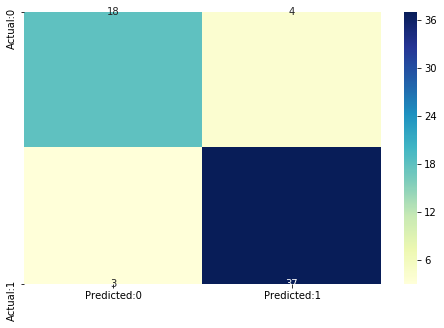

In [314]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [315]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

### <font color=CornflowerBlue>Model Evaluation - Statistics<font>

In [316]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8870967741935484 

 The Miss-classification = 1-Accuracy =  0.11290322580645162 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.925 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.8181818181818182 

 Positive Predictive value = TP / (TP+FP) =  0.9024390243902439 

 Negative predictive Value = TN / (TN+FN) =  0.8571428571428571 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  5.087500000000001 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.0916666666666666


## <font color= red> Final Insights:</font>




 - **<font color=darkblue>All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Anormal spine behaviour prediction.</font>** 
 
 - **<font color=darkblue>The model predicted with 0.88 accuracy. The model is more sensitive than specific.</font>**
 - **<font color=darkblue>The model is more sensitive than specific.</font>**


## Logistic Regression - scaled data

In [317]:
new_features=df_backpain[['pelvictilt','sacral_slope','pelvic_radius','degree_spondylolisthesis','Status']]
X=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

### Splitting the data and scaling it 

In [318]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y.values.ravel(),test_size=0.3,random_state=7)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_scaled=pd.DataFrame(sc.fit_transform(X_train1),columns=X_train1.columns)
test_scaled=pd.DataFrame(sc.fit_transform(X_test1),columns=X_test1.columns)

### Building the model

In [319]:
from sklearn.linear_model import LogisticRegression
logreg1=LogisticRegression()
logreg1.fit(train_scaled,y_train1)
y_pred1=logreg1.predict(X_test1)

### Model Evaluation

#### Model Accuracy 

In [320]:
sklearn.metrics.accuracy_score(y_test1,y_pred1)

0.5698924731182796

#### Confusion matrix

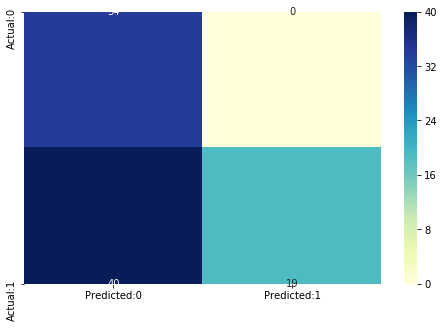

In [321]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test1,y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [322]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

#### Model evaluation statistics

In [323]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.5698924731182796 

 The Miss-classification = 1-Accuracy =  0.4301075268817204 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.3220338983050847 

 Specificity or True Negative Rate = TN / (TN+FP) =  1.0 

 Positive Predictive value = TP / (TP+FP) =  1.0 

 Negative predictive Value = TN / (TN+FN) =  0.4594594594594595 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  inf 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.6779661016949152


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


## <font color= red> Final Insights:</font>

 
 - **<font color=darkblue>The model with scaled data predicted with 0.569 accuracy,which is very less than that of unscaled data</font>**
 - **<font color=darkblue>The model is more specific than sensitive.</font>**
  - **<font color=darkblue>This model is not performing well,so we will go ahead and do the cutoffs based class division based on the above(unscaled data based)model.</font>**

### Now deciding the cutoffs and dividing into classes

- Since the model is predicting Heart disease too many type II errors is not advisable. 
- A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case.
- Hence inorder to increase the sensitivity,  threshold can be lowered.

In [324]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[ 6 16]
 [ 0 40]] 
 with 46 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.2727272727272727 



With 0.2 threshold the Confusion Matrix is  
 [[ 7 15]
 [ 0 40]] 
 with 47 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.3181818181818182 



With 0.3 threshold the Confusion Matrix is  
 [[13  9]
 [ 0 40]] 
 with 53 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.5909090909090909 



With 0.4 threshold the Confusion Matrix is  
 [[14  8]
 [ 1 39]] 
 with 53 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.975 Specificity:  0.6363636363636364 





In [ ]:
'''even though for thresholds 0.1,0.2 thetype2 errors are zero ,we can consider 0.3 as its giving more 
number of correct predictions.'''